In [15]:
# Stock Price Prediction Using LSTM
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

In [16]:
# # Define the data source
# data_source = 'yahoo'

# # Define the stock symbol and the date range
# ticker = 'AAPL'
# start_date = '2010-01-01'
# end_date = '2023-08-15'

# # Define the new URL
# url = 'https://query1.finance.yahoo.com/v7/finance/download/{}?period1={}&period2={}&interval=1d&events=history'.format(ticker, start_date, end_date)

# # Use Python Pandas Datareader to retrieve data from the new URL
# df = data.DataReader(ticker, data_source, start_date, end_date, access_key=url)

import yfinance as yf
# import pandas_datareader as data
yf.pdr_override() # <== that's all it takes :-)
from pandas_datareader import data as pdr

df = pdr.get_data_yahoo('ICICIBANK.NS', start='2010-1-1')
df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,159.454544,160.909088,159.090912,159.945450,132.618256,9162186
2010-01-05,161.454544,163.590912,160.272720,161.463638,133.877060,14659997
2010-01-06,162.727264,164.972733,161.836365,162.699997,134.902191,20410054
2010-01-07,163.045456,163.045456,159.363632,161.163635,133.628296,10852286
2010-01-08,161.654541,161.818176,158.363632,158.899994,131.751419,20580934


In [ ]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-08-21,950.700012,959.299988,948.400024,955.200012,955.200012,13358017
2023-08-22,956.400024,956.950012,949.299988,952.000000,952.000000,16872719
2023-08-23,954.000000,968.049988,949.849976,966.849976,966.849976,14707331
2023-08-24,972.500000,982.400024,966.750000,968.950012,968.950012,28389740
2023-08-25,962.950012,972.599976,960.200012,970.400024,970.400024,10275758


In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3370.000000,3370.000000,3370.000000,3370.000000,3370.000000,3.370000e+03
mean,363.563357,367.855032,358.973507,363.440242,345.142253,1.995825e+07
std,226.755783,228.486794,224.902780,226.796441,229.705621,1.323779e+07
min,120.363632,122.000000,116.545456,118.800003,101.264351,0.000000e+00
25%,199.136364,201.540905,196.259090,199.245449,171.605766,1.215021e+07
50%,280.590897,284.345459,276.834091,280.588638,261.030884,1.687519e+07
75%,422.937500,428.299995,417.000008,423.199989,410.605804,2.390278e+07
max,1004.950012,1008.700012,990.450012,998.299988,982.030884,2.868577e+08


In [ ]:
df = df.drop(['Adj Close'], axis = 1)
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,159.454544,160.909088,159.090912,159.945450,9162186
2010-01-05,161.454544,163.590912,160.272720,161.463638,14659997
2010-01-06,162.727264,164.972733,161.836365,162.699997,20410054
2010-01-07,163.045456,163.045456,159.363632,161.163635,10852286
2010-01-08,161.654541,161.818176,158.363632,158.899994,20580934


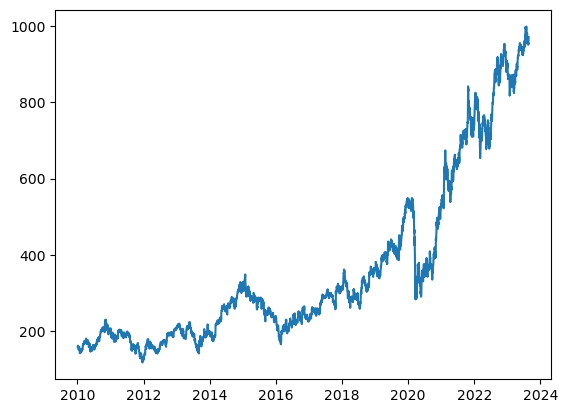

In [ ]:
plt.plot(df.Close)

In [ ]:
ma100 = df.Close.rolling(100).mean()
ma100

Date
2010-01-04           NaN
2010-01-05           NaN
2010-01-06           NaN
2010-01-07           NaN
2010-01-08           NaN
                 ...    
2023-08-21    937.404003
2023-08-22    938.400003
2023-08-23    939.581503
2023-08-24    940.723503
2023-08-25    941.917503
Name: Close, Length: 3370, dtype: float64

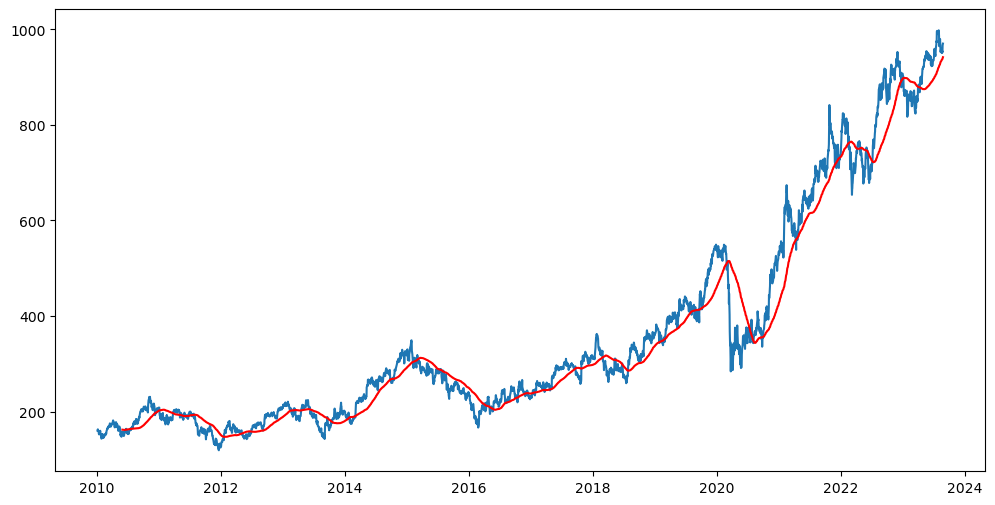

In [ ]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [ ]:
ma200 = df.Close.rolling(200).mean()
ma200

Date
2010-01-04           NaN
2010-01-05           NaN
2010-01-06           NaN
2010-01-07           NaN
2010-01-08           NaN
                 ...    
2023-08-21    909.970253
2023-08-22    910.187253
2023-08-23    910.498003
2023-08-24    910.799503
2023-08-25    911.125003
Name: Close, Length: 3370, dtype: float64

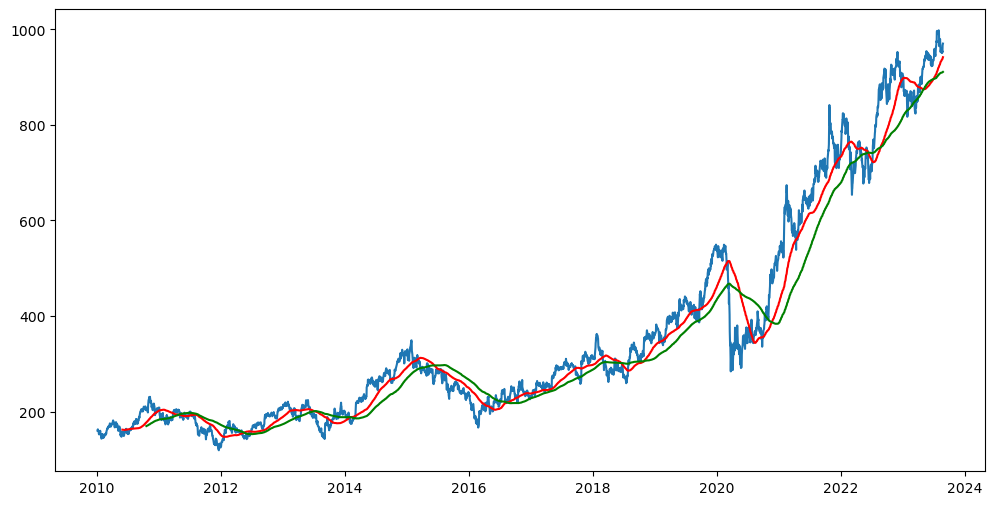

In [ ]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [ ]:
df.shape

(3370, 5)

In [ ]:
# Splitting Data into Training & Testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])
print(data_training.shape)
print(data_testing.shape)


(2359, 1)
(1011, 1)


In [ ]:
data_training.head()

,Close
Date,
2010-01-04,159.945450
2010-01-05,161.463638
2010-01-06,162.699997
2010-01-07,161.163635
2010-01-08,158.899994


In [ ]:
data_testing.head()

,Close
Date,
2019-07-29,429.350006
2019-07-30,425.350006
2019-07-31,424.600006
2019-08-01,417.049988
2019-08-02,410.600006


In [ ]:
# We need to Scale down the Data using minmaxscaler to get it between 0 and 1
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [ ]:
data_training_array = scaler.fit_transform(data_training)
data_training_array
data_training_array.shape

(2359, 1)

In [ ]:
x_train = [] #Features
y_train = [] #Predicted

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

x_train

[array([[0.12772139],
        [0.13243407],
        [0.1362719 ],
        [0.13150281],
        [0.12447614],
        [0.12190818],
        [0.10686717],
        [0.105682  ],
        [0.10266249],
        [0.10669789],
        [0.11849365],
        [0.11970706],
        [0.12673372],
        [0.11248287],
        [0.10571018],
        [0.10012276],
        [0.07557176],
        [0.07599507],
        [0.09986874],
        [0.1029447 ],
        [0.09346293],
        [0.10500472],
        [0.09899394],
        [0.08169541],
        [0.08575903],
        [0.08973797],
        [0.08262666],
        [0.09744187],
        [0.09253168],
        [0.10105396],
        [0.10585128],
        [0.10534333],
        [0.10167483],
        [0.10057424],
        [0.10968916],
        [0.10596415],
        [0.11186205],
        [0.12346025],
        [0.13757   ],
        [0.14389116],
        [0.13827551],
        [0.1401662 ],
        [0.15258277],
        [0.15337292],
        [0.14922465],
        [0

In [ ]:
#Converting to Numpy Arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
#ML Model

from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [ ]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50


2023-08-27 12:33:51.229650: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


71/71 [==============================] - 11s 133ms/step - loss: 0.0289
Epoch 2/50
71/71 [==============================] - 9s 133ms/step - loss: 0.0075
Epoch 3/50
71/71 [==============================] - 10s 135ms/step - loss: 0.0069
Epoch 4/50
71/71 [==============================] - 10s 135ms/step - loss: 0.0065
Epoch 5/50
71/71 [==============================] - 10s 136ms/step - loss: 0.0062
Epoch 6/50
71/71 [==============================] - 10s 136ms/step - loss: 0.0061
Epoch 7/50
71/71 [==============================] - 10s 139ms/step - loss: 0.0051
Epoch 8/50
71/71 [==============================] - 10s 138ms/step - loss: 0.0050
Epoch 9/50
71/71 [==============================] - 10s 139ms/step - loss: 0.0048
Epoch 10/50
71/71 [==============================] - 10s 137ms/step - loss: 0.0047
Epoch 11/50
71/71 [==============================] - 10s 135ms/step - loss: 0.0050
Epoch 12/50
71/71 [==============================] - 10s 137ms/step - loss: 0.0041
Epoch 13/50
71/71 [======

In [5]:
model.save('keras_model.h5')

NameError: name 'model' is not defined

In [ ]:
data_testing.shape

(1011, 1)

In [ ]:
past_100_days = data_training.tail(100)

In [ ]:
final_df = past_100_days._append(data_testing, ignore_index=True)

In [ ]:
final_df.head()

,Close
0,345.549988
1,350.149994
2,354.250000
3,363.250000
4,371.950012


In [ ]:
input_data = scaler.fit_transform(final_df)
input_data

In [ ]:
input_data.shape

(1111, 1)

In [ ]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [ ]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(1011, 100, 1)
(1011,)


In [4]:
# Making Predictions

y_predicted = model.predict(x_test)

NameError: name 'model' is not defined

In [ ]:
y_predicted.shape

(1011, 1)

In [ ]:
scaler.scale_

array([0.00139997])

In [3]:
scale_factor = 1/0.00139997
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

NameError: name 'y_predicted' is not defined

In [ ]:
plt.figure(figsize=(12,6),)